##### Importar os dados

In [2]:
# importa bibliotecas
import pandas as pd

In [3]:
# importa os dados 
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
df = pd.read_csv('dataset.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


##### Renomear colunas

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
# renomeia colunas
df.rename(columns={'default payment next month' : 'inadimplentes', 'SEX':'Genero', 'EDUCATION':'Escolaridade',
'MARRIAGE':'Estado civil', 'AGE':'Idade', }, inplace=True)

##### Transformação (padronização dos dados)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# cria cópia do df
df2 = df

# colunas para serem padronizadas
# as colunas foram escolhidas porque possuem numeração, em que a diferença dos números poderiam 
# tendenciar a variável resposta de forma muito forte, mesmo sem causalidade 
colunas = ['LIMIT_BAL', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# padronizando
df2_padronizado = df2[colunas]
df2_padronizado = scaler.fit_transform(df2_padronizado)
df2_padronizado = pd.DataFrame(df2_padronizado)

# renomeando as colunas padronizadas
df2_padronizado.rename(columns={0:'LIMIT_BAL',1:'PAY_0', 2:'PAY_2', 3:'PAY_3', 4:'PAY_4',
       5:'PAY_5', 6:'PAY_6', 7:'BILL_AMT1', 8:'BILL_AMT2', 9:'BILL_AMT3', 10:'BILL_AMT4',
       11:'BILL_AMT5', 12:'BILL_AMT6', 13:'PAY_AMT1', 14:'PAY_AMT2', 15:'PAY_AMT3',
       16:'PAY_AMT4', 17:'PAY_AMT5', 18:'PAY_AMT6'}, inplace=True)

#cria index para fazer o merge
df2_padronizado['ID'] = df2_padronizado.index
df2_padronizado

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ID
0,-1.136720,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,0
1,-0.365981,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,2
3,-0.905498,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,3
4,-0.905498,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,29995
29996,-0.134759,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,29996
29997,-1.059646,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,29997
29998,-0.674276,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,29998


In [6]:
# df[colunas que não precisaram ser padronizadas].mesclagem(df2_padronizado, how=left, on=coluna em comum, com mesmos valores)
df3 = df[['ID','Escolaridade','inadimplentes', 'Genero', 'Estado civil', 'Idade']].merge(df2_padronizado, how='left', on='ID')
df3
#Agora tenho todas colunas que quero padronizadas

,ID,Escolaridade,inadimplentes,Genero,Estado civil,Idade,LIMIT_BAL,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,2,1,2,1,24,-0.365981,-0.874991,1.782348,0.138865,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
1,2,2,1,2,2,26,-0.597202,0.014861,0.111736,0.138865,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
2,3,2,0,2,2,34,-0.905498,0.014861,0.111736,0.138865,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
3,4,2,0,2,1,37,-0.905498,-0.874991,0.111736,-0.696663,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
4,5,2,0,1,1,57,-0.905498,0.014861,0.111736,0.138865,...,0.152777,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,3,0,1,1,39,-0.134759,-0.874991,-0.723570,-0.696663,...,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29996,29997,3,0,1,2,43,-1.059646,3.574267,2.617654,1.809921,...,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29997,29998,2,1,1,2,37,-0.674276,0.904712,-0.723570,0.138865,...,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904
29998,29999,3,1,1,1,41,-0.905498,0.014861,0.111736,0.138865,...,0.039667,-0.104582,-0.129669,-0.395592,-0.216481,-0.178866,-0.215582,-0.244230,-0.248683,-0.237130


##### Equilibrando as classes

In [7]:
# verifica desbalanceamento, há maior quantidade de 0 (clientes normais) que 1(inadimplentes)
df3['inadimplentes'].value_counts()

0    23364
1     6636
Name: inadimplentes, dtype: int64

C:\Users\madu_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inadimplentes', ylabel='count'>

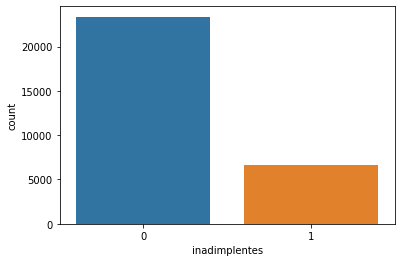

In [8]:
# visualização gráfica das classes desbalanceadas
import seaborn as sns
sns.countplot(df3['inadimplentes'])

In [7]:
df3_minoritario = df3[df3.inadimplentes==1]
df3_majoritario = df3[df3.inadimplentes==0]

In [17]:
df3_minoritario.shape

(6636, 25)

In [18]:
df3_majoritario.shape

(23364, 25)

In [8]:
# oversample: aumenta a quantidade de dados da classe minoritária
# https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9
from sklearn.utils import resample
df3_classe_minoritaria_upsample = resample(df3_minoritario,
                                            replace=True,
                                            n_samples=23364,
                                            random_state=150)

In [20]:
df3_classe_minoritaria_upsample.shape

(23364, 25)

In [9]:
# df3_balanceado contém os dados das duas classes em equilíbrio
df3_balanceado = pd.concat([df3_majoritario, df3_classe_minoritaria_upsample])

In [10]:
# Verifica equilíbtrio de classes
df3_balanceado.inadimplentes.value_counts()

0    23364
1    23364
Name: inadimplentes, dtype: int64

##### Prepara X e Y para o modelo de Machine Learning

In [14]:
# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
import numpy as np

# Especificar random seed para que treino e teste tenham sempre as mesmas linhas
# 70% treino e 30% teste
np.random.seed(0)
df_train, df_test = train_test_split(df3_balanceado, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
df_train

,ID,Escolaridade,inadimplentes,Genero,Estado civil,Idade,LIMIT_BAL,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
18336,18337,1,1,2,2,22,-0.674276,0.014861,0.111736,0.138865,...,-0.470771,-0.433595,-0.422994,-0.411545,-0.220285,-0.191887,-0.225692,-0.286998,-0.194422,-0.281738
3640,3641,3,0,1,2,41,2.562830,-0.874991,0.111736,0.138865,...,-0.573845,-0.638564,-0.558266,-0.565273,0.096022,-0.161158,-0.296177,0.100596,0.028447,-0.130308
6011,6012,1,0,2,1,30,1.483795,-1.764843,-1.558876,-1.532192,...,-0.620335,-0.672497,-0.663059,-0.527978,-0.341942,-0.083469,-0.296801,-0.308063,0.172117,-0.265819
27499,27500,2,1,1,1,59,-1.136720,0.014861,0.111736,0.138865,...,-0.410496,-0.372754,-0.419277,-0.652724,-0.264359,-0.193493,-0.228645,-0.289168,-0.314136,-0.293382
24764,24765,2,0,1,2,35,-0.905498,1.794564,1.782348,0.138865,...,1.171679,1.502353,1.583860,1.609206,-0.341942,0.016442,0.572188,-0.308063,-0.314136,0.241011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,21139,2,0,1,1,41,0.327685,-0.874991,-0.723570,-0.696663,...,-0.666753,-0.672497,-0.663059,-0.642061,-0.341942,-0.223353,-0.296801,-0.308063,-0.272573,-0.293382
106,107,2,0,2,1,36,1.406721,-0.874991,-0.723570,-0.696663,...,-0.667517,-0.659020,-0.644143,-0.564349,-0.204768,-0.225653,-0.247559,-0.234655,0.030345,-0.011504
15626,15627,2,0,2,2,33,1.175499,-1.764843,-1.558876,-1.532192,...,-0.542064,-0.672497,-0.643320,-0.633414,0.324604,0.151943,-0.296801,-0.231463,-0.238865,-0.293382
18402,18403,2,0,2,2,23,-1.136720,0.014861,-0.723570,0.138865,...,-0.645383,-0.631444,-0.580142,-0.648560,-0.263393,-0.201999,-0.203200,-0.050114,-0.314136,-0.100888


In [12]:
# Define X e Y de treino
X_train1 = df_train.drop('inadimplentes', axis=1)
y_train1 = df_train.pop('inadimplentes')


In [15]:
X_train1.isna().sum()
# X_train tem 1 regristro de nulo
X_train1 = X_train1.fillna(0)

In [16]:
X_test1 = df_test.drop('inadimplentes', axis=1)
X_test1 = X_test1.fillna(0)

y_test1 = df_test.pop('inadimplentes')

##### VIF

In [46]:
# Checando VIF (Variance Inflation Factor)
# https://ichi.pro/pt/modelo-de-regressao-linear-multipla-usando-python-aprendizado-de-maquina-228751987250986
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# ideal é vif<5

,features,VIF
4,Idade,9.54
2,Genero,8.82
1,Escolaridade,6.66
3,Estado civil,6.35
10,PAY_5,4.58
9,PAY_4,4.23
0,ID,3.83
8,PAY_3,3.60
11,PAY_6,3.14
7,PAY_2,3.13


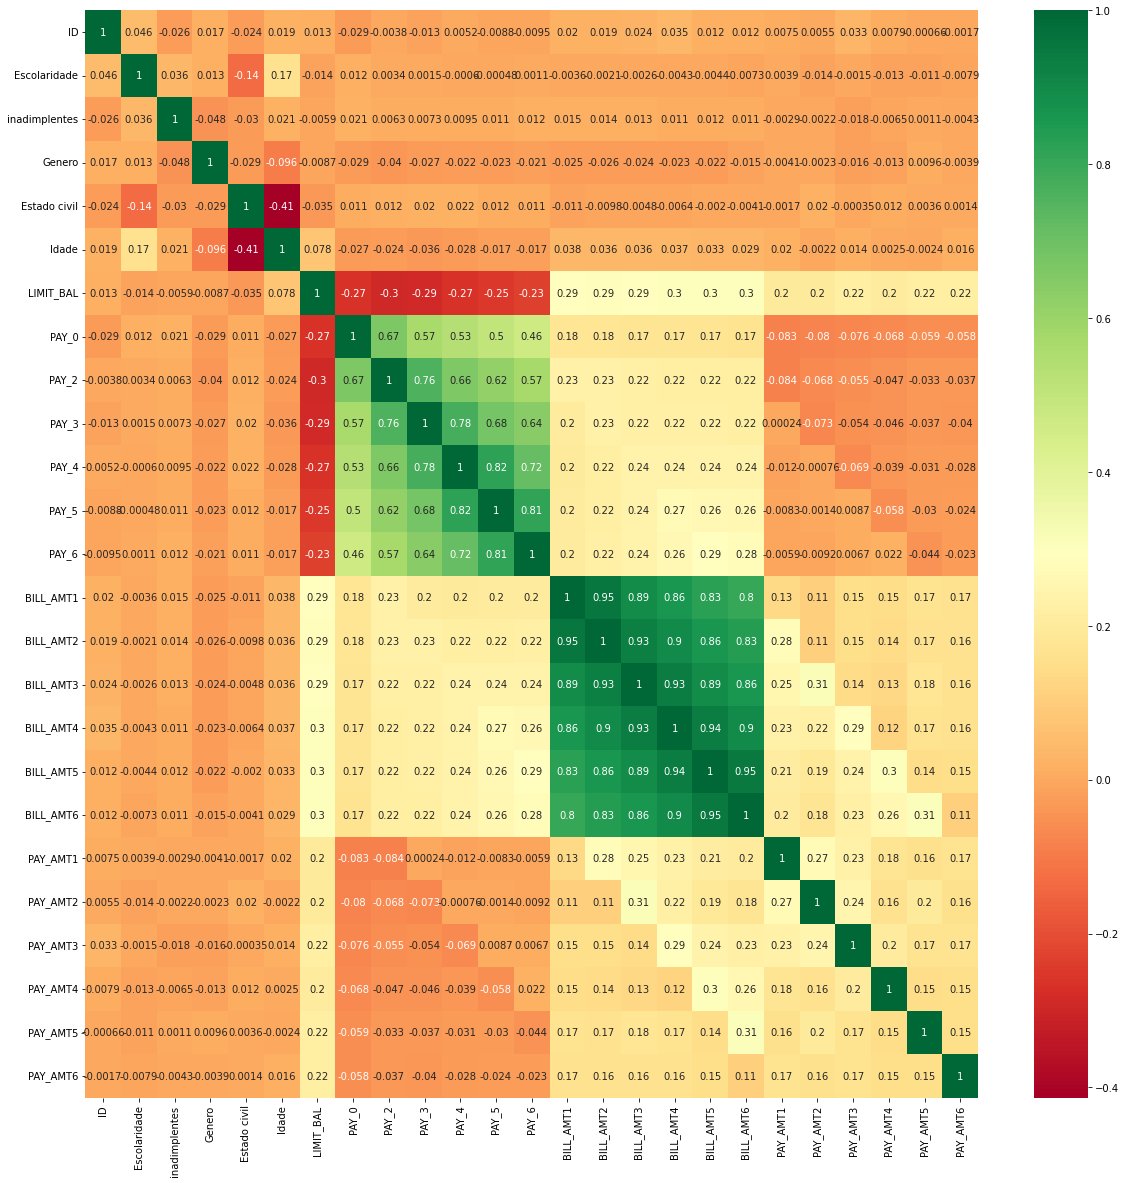

In [18]:
# matriz de correlação de Pearson
import seaborn as sns
import matplotlib.pyplot as plt
matriz_corr = df3_balanceado.corr()
top_corr_features = matriz_corr.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df3_balanceado[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [40]:
# Elimina colunas BILL_AMT2, BILL_AMT5, BILL_AMT3, BILL_AMT4, BILL_AMT6 
# pela multicolinearidade detectada pelo VIF. BILL_AMT1 não é eliminado, pois, dentro os
# que possuem VIF parecido, contém correlação mais forte com a variável resposta
X_train1 = X_train1.drop(['BILL_AMT2','BILL_AMT5', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT6'],1)

In [45]:
# Define X e Y de teste
X_test1 = X_test1.drop(['BILL_AMT2','BILL_AMT5', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT6'], axis=1)

In [47]:
# Aplica VIF novamente

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
4,Idade,9.54
2,Genero,8.82
1,Escolaridade,6.66
3,Estado civil,6.35
10,PAY_5,4.58
9,PAY_4,4.23
0,ID,3.83
8,PAY_3,3.60
11,PAY_6,3.14
7,PAY_2,3.13


##### SelectKBest Features 

In [48]:
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# https://www.youtube.com/watch?v=4RGT2YRHERY 8:00
# f_classif para um modelo de correlação mais linear
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=16)
fit = bestfeatures.fit(X_train1,y_train1)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train1.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(16,'Score')) 

           Specs      Score
2         Genero  62.729980
1   Escolaridade  31.728020
3   Estado civil  25.340958
0             ID  21.198686
4          Idade  12.414024
6          PAY_0  10.062077
15      PAY_AMT3   6.454855
12     BILL_AMT1   5.661970
16      PAY_AMT4   2.788481
11         PAY_6   2.033366
10         PAY_5   1.657579
18      PAY_AMT6   0.626578
9          PAY_4   0.552345
13      PAY_AMT1   0.329695
17      PAY_AMT5   0.247350
5      LIMIT_BAL   0.055287


In [49]:
# mutual_info_classif para um modelo de correlação não tão linear
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=15)
fit = bestfeatures.fit(X_train1,y_train1)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train1.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(15,'Score')) 

           Specs     Score
0             ID  0.215971
12     BILL_AMT1  0.175110
13      PAY_AMT1  0.089573
14      PAY_AMT2  0.084775
15      PAY_AMT3  0.078749
16      PAY_AMT4  0.075545
18      PAY_AMT6  0.073926
17      PAY_AMT5  0.070989
4          Idade  0.008209
8          PAY_3  0.006886
2         Genero  0.005770
1   Escolaridade  0.004500
3   Estado civil  0.003344
5      LIMIT_BAL  0.003032
11         PAY_6  0.000808


### Regressão Logística com colunas selecionadas pelo f_classif

In [17]:
colunas =  ['Genero', 'Escolaridade', 'Estado civil', 'Idade', 'PAY_0', 'BILL_AMT1',
            'PAY_AMT3', 'PAY_AMT4', 'PAY_6', 'PAY_5', 'PAY_AMT6', 'PAY_4', 'PAY_AMT1',
            'PAY_AMT5', 'LIMIT_BAL']

X_train2 = X_train1[colunas]
X_test2 = X_test1[colunas]
y_train2 = y_train1
y_test2 = y_test1


In [98]:
# Treina o modelo com todas as colunas
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train2, y_train2)

LogisticRegression()

In [99]:
# Predição 
y_pred_rl_fc = logreg.predict(X_test2)

In [102]:
# Métricas

# acurácia método 1
acr1_rl_fc = logreg.score(X_test2, y_test2)

from sklearn.metrics import accuracy_score
acr2_rl = accuracy_score(y_test2, y_pred_rl_fc)

# matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report
matrix_rl = confusion_matrix(y_test2, y_pred_rl_fc)

classif_rl_fc = classification_report(y_test2, y_pred_rl_fc)

In [101]:
acr1_rl_fc

0.5409800984378343

In [104]:
print(classif_rl_fc)

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      7014
           1       0.54      0.54      0.54      7005

    accuracy                           0.54     14019
   macro avg       0.54      0.54      0.54     14019
weighted avg       0.54      0.54      0.54     14019



In [105]:
# Matriz de confusão

dados_matriz = {
    'y_real': y_test2,
    'y_pred': y_pred_rl_fc
}

confusion_matrix = pd.crosstab(dados_matriz['y_real'], dados_matriz['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0     1
Actual               
0          3819  3195
1          3240  3765


### Regressão Logística com colunas selecionadas pelo mutual_info_classif

In [86]:
colunas =  ['BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT6',
            'PAY_AMT5', 'Idade', 'PAY_3', 'Genero', 'Escolaridade', 'Escolaridade', 'Estado civil',
            'LIMIT_BAL', 'PAY_6']


X_train3 = X_train1[colunas]
X_test3 = X_test1[colunas]
y_train3 = y_train1
y_test3 = y_test1

In [87]:
# Treina o modelo com todas as colunas
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train3, y_train3)

LogisticRegression()

In [88]:
# Predição 
y_pred_rl_mic = logreg.predict(X_test3)

In [92]:
# Métricas

# acurácia método 1
acr1_rl_mic = logreg.score(X_test3, y_test3)

from sklearn.metrics import accuracy_score
acr2_rl = accuracy_score(y_test3, y_pred_rl_mic)

# matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report
matrix_rl = confusion_matrix(y_test3, y_pred_rl_mic)

classif_rl_mic = classification_report(y_test3, y_pred_rl_mic)

In [94]:
acr1_rl_mic

0.539838790213282

In [95]:
print(classif_rl_mic)

              precision    recall  f1-score   support

           0       0.54      0.56      0.55      7014
           1       0.54      0.52      0.53      7005

    accuracy                           0.54     14019
   macro avg       0.54      0.54      0.54     14019
weighted avg       0.54      0.54      0.54     14019



In [96]:
# Matriz de confusão

dados_matriz = {
    'y_real': y_test3,
    'y_pred': y_pred_rl_mic
}

confusion_matrix = pd.crosstab(dados_matriz['y_real'], dados_matriz['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0     1
Actual               
0          3927  3087
1          3364  3641


###### Recall de modelo com f_classif = 0.54 para classe 1, já para mutual_info_classif é 0.52. Portanto as colunas escolhidas pelo f_classif são melhores, julgando que Falsos Negativos são mais importantes

### Regressão Logística com 10 colunas selecionadas pelo f_classif

In [46]:
colunas =  ['Genero', 'Escolaridade', 'Estado civil', 'Idade', 'PAY_0', 'BILL_AMT1',
            'PAY_AMT3', 'PAY_AMT4', 'PAY_6', 'PAY_5']

X_train4 = X_train1[colunas]
X_test4 = X_test1[colunas]
y_train4 = y_train1
y_test4 = y_test1

In [108]:
# Treina o modelo com todas as colunas
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train4, y_train4)

LogisticRegression()

In [109]:
# Predição 
y_pred_rl_fc_reduzido = logreg.predict(X_test4)

In [110]:
# Métricas

# acurácia método 1
acr1_rl_fc_red = logreg.score(X_test4, y_test4)

from sklearn.metrics import accuracy_score
acr2_rl = accuracy_score(y_test4, y_pred_rl_fc_reduzido)

# matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report
matrix_rl = confusion_matrix(y_test4, y_pred_rl_fc_reduzido)

classif_rl_fc_red = classification_report(y_test4, y_pred_rl_fc_reduzido)

In [111]:
acr1_rl_fc_red

0.5399101219773165

In [112]:
print(classif_rl_fc_red)

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      7014
           1       0.54      0.54      0.54      7005

    accuracy                           0.54     14019
   macro avg       0.54      0.54      0.54     14019
weighted avg       0.54      0.54      0.54     14019



In [113]:
# Matriz de confusão

dados_matriz = {
    'y_real': y_test4,
    'y_pred': y_pred_rl_fc_reduzido
}

confusion_matrix = pd.crosstab(dados_matriz['y_real'], dados_matriz['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0     1
Actual               
0          3804  3210
1          3240  3765


### Rede neural

##### Rede neural com todas colunas

In [116]:
from sklearn.neural_network import MLPClassifier

mlp =  MLPClassifier(random_state=5)
mlp.fit(X_train1, y_train1)
y_pred_mlp_completo = mlp.predict(X_test1)

In [115]:
acr1_mlp = mlp.score(X_test1, y_test1)
acr1_mlp

0.5018189599828804

In [117]:
# Matriz de confusão

dados_matriz = {
    'y_real': y_test1,
    'y_pred': y_pred_mlp_completo
}

confusion_matrix = pd.crosstab(dados_matriz['y_real'], dados_matriz['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0   1
Actual             
0          6951  63
1          6921  84


##### Rede neural com 15 melhores colunas selecionadas pelo mutual_info_classif

In [69]:
from sklearn.neural_network import MLPClassifier

mlp =  MLPClassifier(random_state=5)
mlp.fit(X_train3, y_train3)
y_pred_mlp3 = mlp.predict(X_test3)


C:\Users\madu_\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
acr1_mlp = mlp.score(X_test3, y_test3)
acr1_mlp

0.5701547899279549

In [70]:
classif_rl = classification_report(y_test3, y_pred_mlp3)
print(classif_rl)

              precision    recall  f1-score   support

           0       0.58      0.49      0.53      7014
           1       0.56      0.65      0.60      7005

    accuracy                           0.57     14019
   macro avg       0.57      0.57      0.57     14019
weighted avg       0.57      0.57      0.57     14019



In [71]:

dados_matriz = {
    'y_real': y_test3,
    'y_pred': y_pred_mlp3
}

confusion_matrix = pd.crosstab(dados_matriz['y_real'], dados_matriz['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted     0     1
Actual               
0          3418  3596
1          2430  4575
